This is my first attempt to understand the data in Kaggle's <a href="https://www.kaggle.com/c/whats-cooking">"What's cooking"</a> challenge.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Training_data = pd.read_json("../input/whatscooking/train.json")
print type(Training_data)
Training_data.head()

<class 'pandas.core.frame.DataFrame'>


,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
Training_data['str_ingredients'] = Training_data.ingredients.apply(lambda x: ','.join(y for y in x))
Training_data.head()

,cuisine,id,ingredients,str_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce,black olives,grape tomatoes,ga..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour,ground pepper,salt,tomatoes,ground..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs,pepper,salt,mayonaise,cooking oil,green c..."
3,indian,22213,"[water, vegetable oil, wheat, salt]","water,vegetable oil,wheat,salt"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper,shallots,cornflour,cayenne pepper..."


In [4]:
Training_data.describe()

,id
count,39774.000000
mean,24849.536959
std,14360.035505
min,0.000000
25%,12398.250000
50%,24887.000000
75%,37328.500000
max,49717.000000


In [13]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(Training_data, test_size = 0.2)
train.head()

,cuisine,id,ingredients,str_ingredients
31201,mexican,10583,"[shredded cheddar cheese, green onions, tortil...","shredded cheddar cheese,green onions,tortillas..."
7760,italian,21523,"[condensed cream of chicken soup, grated parme...","condensed cream of chicken soup,grated parmesa..."
18803,brazilian,44212,"[large eggs, vegetable oil, powdered sugar, wh...","large eggs,vegetable oil,powdered sugar,whole ..."
30801,southern_us,31291,"[cocktail sauce, tiger prawn, old bay seasonin...","cocktail sauce,tiger prawn,old bay seasoning,w..."
13617,irish,30334,"[chicken stock, beef stock, asparagus spears, ...","chicken stock,beef stock,asparagus spears,zucc..."


In [14]:
train.describe()

,id
count,31819.000000
mean,24851.262862
std,14362.853880
min,1.000000
25%,12383.500000
50%,24934.000000
75%,37370.500000
max,49716.000000


In [15]:
test.head()

,cuisine,id,ingredients,str_ingredients
5713,moroccan,44758,"[ground black pepper, garlic cloves, purple on...","ground black pepper,garlic cloves,purple onion..."
25431,italian,45132,"[pepper, marinara sauce, yellow onion, roasted...","pepper,marinara sauce,yellow onion,roasted red..."
21306,brazilian,6741,"[granulated sugar, key lime, cachaca]","granulated sugar,key lime,cachaca"
35098,filipino,28945,"[worcestershire sauce, onions, water, ground m...","worcestershire sauce,onions,water,ground musta..."
2903,mexican,10620,"[lettuce, pie shell, onions, cheese, sour crea...","lettuce,pie shell,onions,cheese,sour cream,tom..."


In [16]:
test.describe()

,id
count,7955.000000
mean,24842.633564
std,14349.657060
min,0.000000
25%,12454.000000
50%,24696.000000
75%,37163.500000
max,49717.000000


In [17]:
cuisines = Training_data.groupby("cuisine").count().sort("id", ascending=False)
cuisines.head()

,id,ingredients,str_ingredients
cuisine,,,
italian,7838,7838,7838
mexican,6438,6438,6438
southern_us,4320,4320,4320
indian,3003,3003,3003
chinese,2673,2673,2673


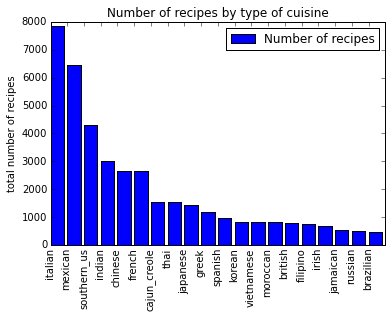

In [18]:
i = range(cuisines.count().ingredients)
plt.bar(i, cuisines.ingredients, label='Number of recipes')
plt.ylabel('total number of recipes')
plt.title('Number of recipes by type of cuisine')
plt.xticks(i, cuisines.index.values, rotation='vertical')
plt.legend(loc='upper right')
plt.show()

In [19]:
Training_data.ingredients.head()

0    [romaine lettuce, black olives, grape tomatoes...
1    [plain flour, ground pepper, salt, tomatoes, g...
2    [eggs, pepper, salt, mayonaise, cooking oil, g...
3                  [water, vegetable oil, wheat, salt]
4    [black pepper, shallots, cornflour, cayenne pe...
Name: ingredients, dtype: object

In [20]:
import itertools
global_pantry = pd.DataFrame.from_dict({key:len(list(group)) for key, group in itertools.groupby(sorted(list(itertools.chain.from_iterable(Training_data.ingredients))))}, orient='index')
global_pantry.columns = ['num_recipes']
print global_pantry.count()
global_pantry.head()

num_recipes    6714
dtype: int64


,num_recipes
low-sodium fat-free chicken broth,22
sweetened coconut,3
baking chocolate,3
egg roll wrappers,57
bottled low sodium salsa,1


In [21]:
global_pantry = global_pantry.sort('num_recipes', ascending=False)
global_pantry.head()

,num_recipes
salt,18049
onions,7972
olive oil,7972
water,7457
garlic,7380


In [22]:
global_pantry.tail()

,num_recipes
Wish-Bone® Robusto Italian Dressing,1
moose,1
whole crab,1
Knorr Beef Stock Cubes,1
cinnamon graham crackers,1


In [23]:
global_pantry.index.values

array([u'salt', u'onions', u'olive oil', ..., u'whole crab',
       u'Knorr Beef Stock Cubes', u'cinnamon graham crackers'], dtype=object)

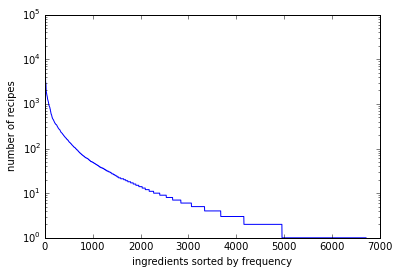

In [24]:
plt.plot(global_pantry.num_recipes)
plt.yscale('log')
plt.xlabel('ingredients sorted by frequency')
plt.ylabel('number of recipes')
plt.show()

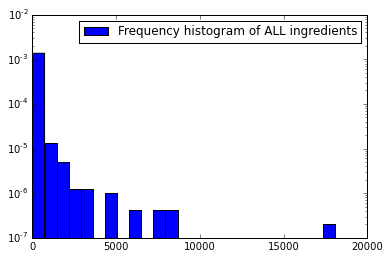

In [25]:
# Histogram of ingredients's frequency
plt.hist(global_pantry.num_recipes, bins=25, normed=True, log=True, label="Frequency histogram of ALL ingredients")
plt.legend(loc='upper right')
plt.show()

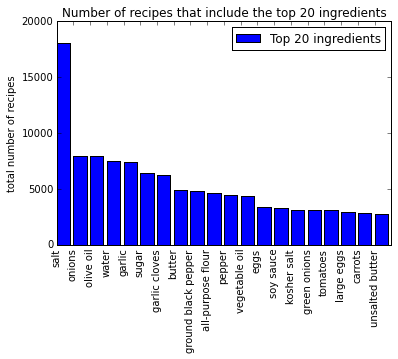

In [26]:
N_ingredients = 20
i = range(N_ingredients)
plt.bar(i, global_pantry.num_recipes[:N_ingredients], label='Top {} ingredients'.format(N_ingredients))
plt.ylabel('total number of recipes')
plt.title('Number of recipes that include the top {} ingredients'.format(N_ingredients))
plt.xticks(i, global_pantry.index.values[:N_ingredients], rotation='vertical')
plt.legend(loc='upper right')
plt.show()

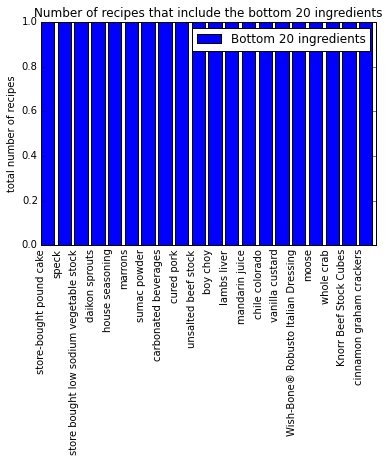

In [27]:
N_ingredients = 20
i = range(N_ingredients)
plt.bar(i, global_pantry.num_recipes[-N_ingredients:], label='Bottom {} ingredients'.format(N_ingredients))
plt.ylabel('total number of recipes')
plt.title('Number of recipes that include the bottom {} ingredients'.format(N_ingredients))
plt.xticks(i, global_pantry.index.values[-N_ingredients:], rotation='vertical')
plt.legend(loc='upper right')
plt.show()

In [28]:
from sklearn.feature_extraction.text import HashingVectorizer, CountVectorizer, TfidfVectorizer
vect = TfidfVectorizer(sublinear_tf=True, vocabulary=global_pantry.index.values)
vect

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=True,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=array([u'salt', u'onions', ..., u'Knorr Beef Stock Cubes',
       u'cinnamon graham crackers'], dtype=object))

In [39]:
vect.vocabulary

array([u'salt', u'onions', u'olive oil', ..., u'whole crab',
       u'Knorr Beef Stock Cubes', u'cinnamon graham crackers'], dtype=object)

In [40]:
train.head()

,cuisine,id,ingredients,str_ingredients
31201,mexican,10583,"[shredded cheddar cheese, green onions, tortil...","shredded cheddar cheese,green onions,tortillas..."
7760,italian,21523,"[condensed cream of chicken soup, grated parme...","condensed cream of chicken soup,grated parmesa..."
18803,brazilian,44212,"[large eggs, vegetable oil, powdered sugar, wh...","large eggs,vegetable oil,powdered sugar,whole ..."
30801,southern_us,31291,"[cocktail sauce, tiger prawn, old bay seasonin...","cocktail sauce,tiger prawn,old bay seasoning,w..."
13617,irish,30334,"[chicken stock, beef stock, asparagus spears, ...","chicken stock,beef stock,asparagus spears,zucc..."


In [41]:
X_train = vect.fit_transform(train.str_ingredients)
X_train

<31819x6714 sparse matrix of type '<type 'numpy.float64'>'
	with 364274 stored elements in Compressed Sparse Row format>

In [42]:
vect.idf_

array([  1.5169727,   2.2239703,  11.3678503, ...,  11.3678503,
        11.3678503,  11.3678503])

In [43]:
Y_train = train.cuisine

In [44]:
X_test = vect.transform(test.str_ingredients)
X_test

<7955x6714 sparse matrix of type '<type 'numpy.float64'>'
	with 91886 stored elements in Compressed Sparse Row format>

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, Y_train)

array([u'italian', u'italian', u'brazilian', ..., u'french', u'indian',
       u'mexican'], dtype=object)

In [55]:
predictions = classifier.predict(X_test)
print type(predictions)
predictions

<type 'numpy.ndarray'>


array([u'italian', u'italian', u'brazilian', ..., u'french', u'indian',
       u'mexican'], dtype=object)

In [56]:
prediction_comparison = predictions==test.cuisine
total = prediction_comparison.count()
true = prediction_comparison.sum()
accuracy = (100.0 * true)/total
"Total: {}, Correct: {}, Accuracy: {}".format(total, true, accuracy)

'Total: 7955, Correct: 5878, Accuracy: 73.8906348209'

In [67]:
Testing_data = pd.read_json("../input/whatscooking/test.json")
Testing_data['str_ingredients'] = Testing_data.ingredients.apply(lambda x: ','.join(y for y in x))
Testing_data.describe()
X_Test = vect.transform(Testing_data.str_ingredients)
X_Test

<9944x6714 sparse matrix of type '<type 'numpy.float64'>'
	with 114350 stored elements in Compressed Sparse Row format>

In [68]:
Predictions = classifier.predict(X_Test)
Predictions

array([u'irish', u'southern_us', u'italian', ..., u'italian',
       u'southern_us', u'mexican'], dtype=object)

In [81]:
Predicted_data = Testing_data.copy()
print type(Predicted_data)
Predicted_data

<class 'pandas.core.frame.DataFrame'>


,id,ingredients,str_ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi...","baking powder,eggs,all-purpose flour,raisins,m..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...","sugar,egg yolks,corn starch,cream of tartar,ba..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil...","sausage links,fennel bulb,fronds,olive oil,cub..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,...","meat cuts,file powder,smoked sausage,okra,shri..."
4,35687,"[ground black pepper, salt, sausage casings, l...","ground black pepper,salt,sausage casings,leeks..."
5,38527,"[baking powder, all-purpose flour, peach slice...","baking powder,all-purpose flour,peach slices,c..."
6,19666,"[grape juice, orange, white zinfandel]","grape juice,orange,white zinfandel"
7,41217,"[ground ginger, white pepper, green onions, or...","ground ginger,white pepper,green onions,orange..."
8,28753,"[diced onions, taco seasoning mix, all-purpose...","diced onions,taco seasoning mix,all-purpose fl..."
9,22659,"[eggs, cherries, dates, dark muscovado sugar, ...","eggs,cherries,dates,dark muscovado sugar,groun..."


In [82]:
Predicted_data['cuisine'] = Predictions

In [83]:
submission = Predicted_data[['id', 'cuisine']]
submission

,id,cuisine
0,18009,irish
1,28583,southern_us
2,41580,italian
3,29752,cajun_creole
4,35687,italian
5,38527,southern_us
6,19666,italian
7,41217,chinese
8,28753,mexican
9,22659,french


In [87]:
submission.to_csv('../output/whatscooking/first_submission.csv', index=False)